# Imports

In [1]:
import warnings
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

from dstoolkit.automl.regressor import AutoMLCatBoost, AutoMLCatBoostCV
from dstoolkit.metrics import plots
from dstoolkit.model import analysis

/home/junior/Documentos/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.filterwarnings("ignore")

## Functions

In [3]:
def generate_synthetic_regression_data(
    n_samples=2000,
    n_features=20,
    n_informative=10,
    noise=0.2,
    test_size=0.2,
    valid_size=0.2,
    random_state=42
):
    """
    Gera dados sintéticos para problemas de regressão.
    
    Parâmetros
    ----------
    n_samples : int
        Número total de observações a serem geradas.
    n_features : int
        Número total de variáveis preditoras.
    n_informative : int
        Número de variáveis realmente informativas (as outras serão ruído).
    noise : float
        Nível de ruído adicionado à variável resposta.
    test_size : float
        Proporção da base reservada para teste.
    valid_size : float
        Proporção da base de treino reservada para validação.
    random_state : int
        Semente para reprodutibilidade.
    
    Retorna
    -------
    X_train, y_train, X_valid, y_valid, X_test, y_test : pd.DataFrame
        Bases de treino, validação e teste.
    """

    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        noise=noise,
        random_state=random_state
    )

    # Cria DataFrames nomeados
    feature_names = [f"feature_{i}" for i in range(n_features)]
    X = pd.DataFrame(X, columns=feature_names)
    y = pd.DataFrame(y, columns=["target"])

    # Divide em treino/teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Divide parte de treino em treino/validação
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=valid_size, random_state=random_state
    )

    return X_train, y_train, X_valid, y_valid, X_test, y_test

## Data Base

In [4]:
X_train, y_train, X_valid, y_valid, X_test, y_test = generate_synthetic_regression_data(
    n_samples=6000,
    n_features=20,
    n_informative=8,
    noise=5.0
)

# Regressor

## CatBoost

In [5]:
cat = AutoMLCatBoost(scoring='mean_absolute_error', tune=True, n_trials=50, random_state=42)
cat.train(X_train, y_train, X_valid, y_valid, X_test, y_test)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Absolute Error by Target Quantile'}, xlabel='Target Quantile', ylabel='Absolute Error'>)

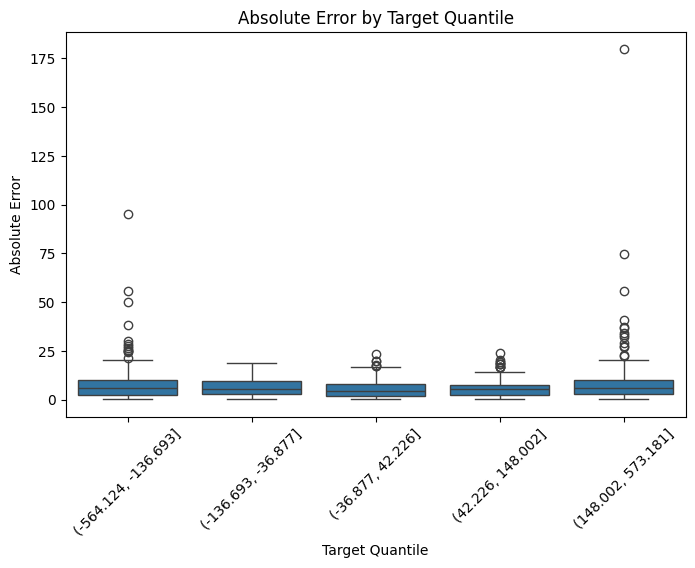

In [6]:
analysis.plot_error_by_quantile(y_test['target'], y_test['pred'], q=5)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'y_true vs y_pred'}, xlabel='y_true', ylabel='y_pred'>)

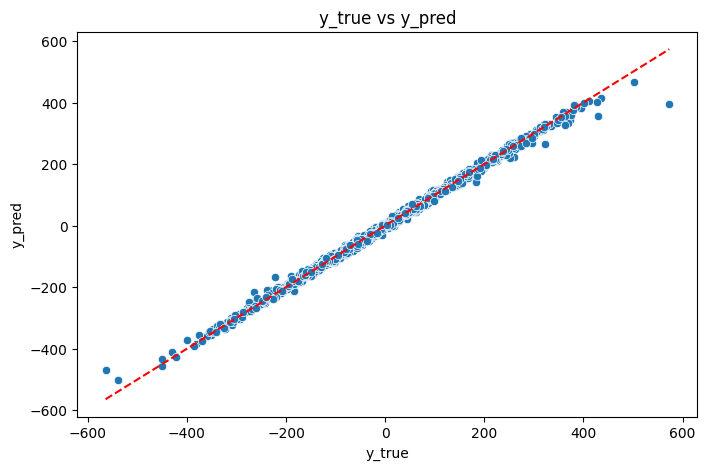

In [7]:
analysis.plot_true_vs_pred(y_test['target'], y_test['pred'])

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Learning Curve'}, xlabel='Training Set Size', ylabel='neg_mean_absolute_error'>)

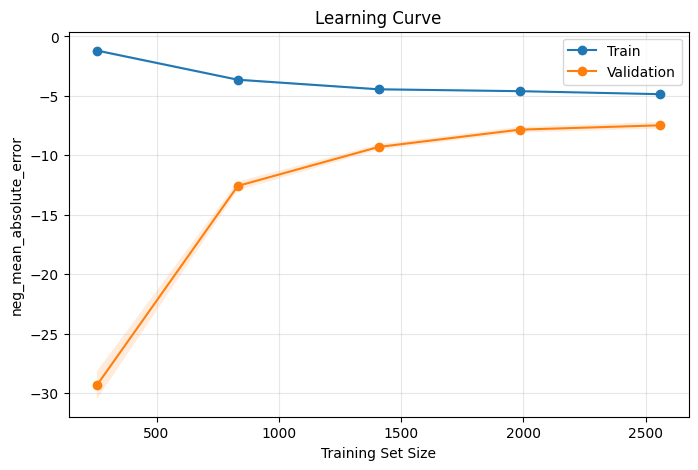

In [8]:
analysis.plot_learning_curve(cat.model, X_train, y_train['target'], 'neg_mean_absolute_error', cv=None, n_jobs=-1)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Residual (Waste) Distribution'}, xlabel='Residual (y_true − y_pred)', ylabel='Frequency'>)

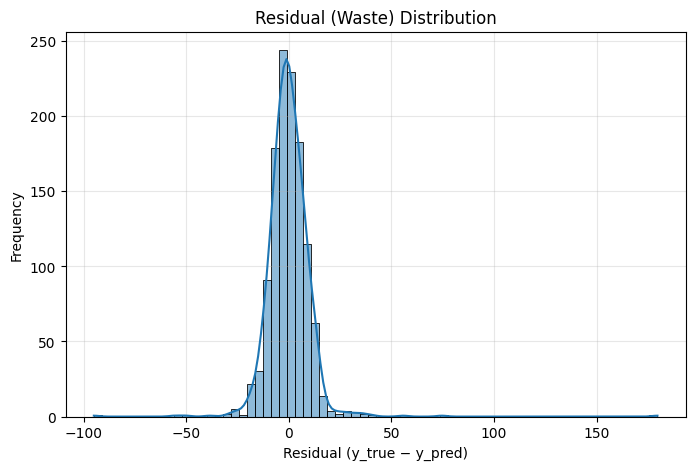

In [12]:
analysis.plot_waste_distribution(y_test['target'], y_test['pred'])